In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

import os

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_07_25/U2020 Alarms 3 months before 2024_07_25 11_45pm/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)





# Sort by 'First Occurred On' in descending order (latest alarms first)
df = data.sort_values(by='First Occurred On', ascending=False)

# Convert 'First Occurred On' to datetime, handle errors and fill NaT with a default date
df['First Occurred On'] = pd.to_datetime(df['First Occurred On'], errors='coerce')

# Reference time
reference_time = pd.to_datetime('2024-07-25 11:45:00')

# Calculate the relative day index, handle NaT by filling with a large negative number
df['Relative Day Index'] = ((df['First Occurred On'] - reference_time).dt.total_seconds() // 86400).fillna(-9999).astype(int)

# Adjust the index to set the 08:00 to 08:00 of the next day as 0, and previous days as -1, -2, -3, etc.
df['Relative Day Index'] = df['Relative Day Index'].apply(lambda x: x if x < 0 else x)


# Print the updated dataframe
df.head(50000)

from sklearn.preprocessing import MinMaxScaler,LabelEncoder

# Filter the data for HUAWEI and Access domain
filtered_data = df[(df['Vendor'] == 'HUAWEI')]
#(data['Domain'] == 'Access')


# Retain only the specified columns
columns_to_keep = ['Site ID', 'Alarm Name', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index']
df_filtered = filtered_data[columns_to_keep]

df_filtered.head(50000)

Mounted at /content/drive


<ipython-input-1-30702c1e454c>:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-30702c1e454c>:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-30702c1e454c>:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-30702c1e454c>:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-30702c1e454c>:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-30702c1e454c>:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,Site ID,Alarm Name,Vendor,Domain,Device Type,Relative Day Index
3780970,NaN,Service Center and Service Communication Failure,HUAWEI,Others,NaN,0
3780971,CM1975,RF Unit RX Channel RTWP/RSSI Unbalanced,HUAWEI,Access,GBTS,0
3780972,KI0099,Rectifier Failure Alarm,HUAWEI,Power,GBTS,0
3780973,NaN,Pod Is Abnormal,HUAWEI,Others,NaN,0
3780974,GM0352,NE Is Disconnected,HUAWEI,Access,eNodeB,0
...,...,...,...,...,...,...
48595,GM0235,Cell Unavailable,HUAWEI,Access,eNodeB,-1
48597,CM0158,RF Unit Power Surge Protector Fault,HUAWEI,Access,GBTS,-1
48598,MR0005,User Plane Fault,HUAWEI,Access,eNodeB,-1
48599,NaN,The Data Transmission Channel Between the Trac...,HUAWEI,Others,NaN,-1


<ipython-input-7-46a41f106c51>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
<ipython-input-7-46a41f106c51>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
<ipython-input-7-46a41f106c51>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Epoch 1/10
26059/26059 ━━━━━━━━━━━━━━━━━━━━ 239s 9ms/step - loss: 67295.1484 - val_loss: 22069.0859
Epoch 2/10
26059/26059 ━━━━━━━━━━━━━━━━━━━━ 234s 9ms/step - loss: 46970.8477 - val_loss: 22059.3496
Epoch 3/10
26059/26059 ━━━━━━━━━━━━━━━━━━━━ 264s 9ms/step - loss: 46944.8320 - val_loss: 23321.6172
Epoch 4/10
26059/26059 ━━━━━━━━━━━━━━━━━━━━ 260s 9ms/step - loss: 46998.6953 - val_loss: 24287.0391
Epoch 5/10
26059/26059 ━━━━━━━━━━━━━━━━━━━━ 232s 9ms/step - loss: 47082.4531 - val_loss: 22624.3672
Epoch 6/10
26059/26059 ━━━━━━━━━━━━━━━━━━━━ 237s 9ms/step - loss: 46872.7188 - val_loss: 21873.0547
Epoch 7/10
26059/26059 ━━━━━━━━━━━━━━━━━━━━ 231s 9ms/step - loss: 46965.0078 - val_loss: 22111.7012
Epoch 8/10
26059/26059 ━━━━━━━━━━━━━━━━━━━━ 266s 9ms/step - loss: 47087.9531 - val_loss: 22468.0586
Epoch 9/10
26059/26059 ━━━━━━━━━━━━━━━━━━━━ 264s 9ms/step - loss: 47094.1133 - val_loss: 24368.3340
Epoch 10/10
26059/26059 ━━━━━━━━━━━━━━━━━━━━ 231s 9ms/step - loss: 46884.6328 - val_loss: 20907.9941

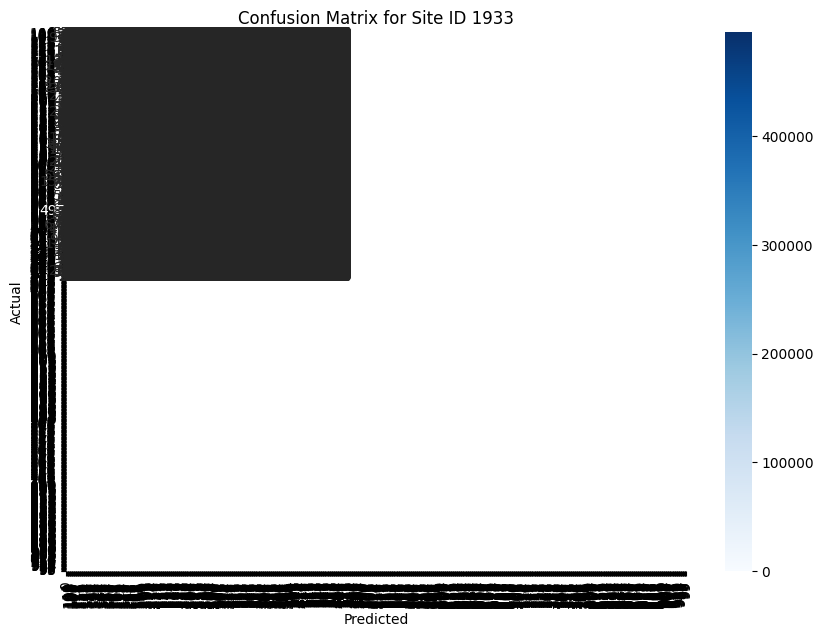

First 10 Predictions for Site ID 1933:
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 456ms/step - loss: 452021.0625 - val_loss: 187914.5469
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 445161.0625 - val_loss: 186117.7969
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 450149.9688 - val_loss: 184301.8281
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 437760.1875 - val_loss: 182777.5938
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 440705.5625 - val_loss: 181530.6719
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 438603.9375 - val_loss: 180564.5312
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 440789.0000 - val_loss: 179747.3906
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 428848.5312 - val_loss: 178980.2969
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 429738.5312 - val_loss: 178227.0938
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 428813.0938 - val_loss: 177477.9531
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 390463.8438 
Test Loss for Site ID

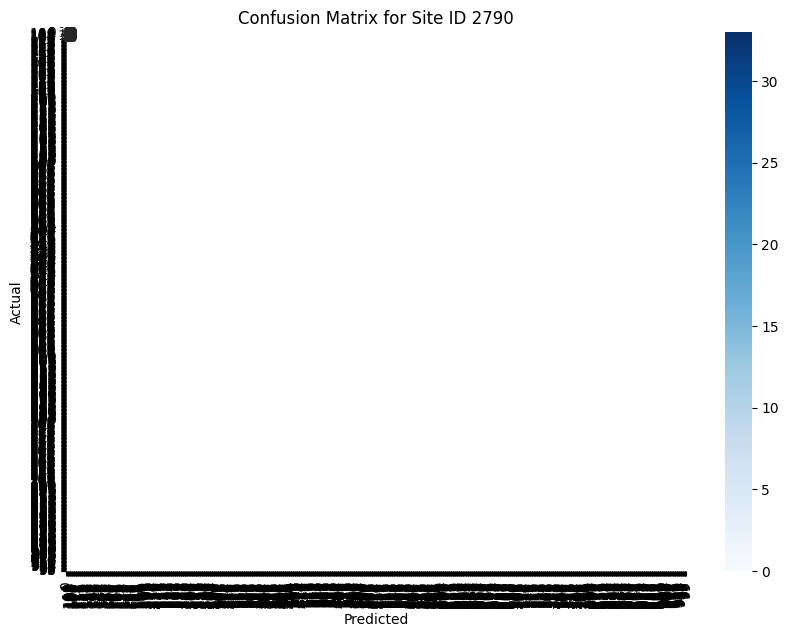

First 10 Predictions for Site ID 2790:
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 404881.4375 - val_loss: 360776.3125
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 386029.7812 - val_loss: 345908.8750
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 374378.9375 - val_loss: 331837.8125
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 356632.3125 - val_loss: 318475.9688
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 345821.5000 - val_loss: 305620.4688
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 330313.1875 - val_loss: 293290.6250
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 316992.7500 - val_loss: 281386.3125
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 304602.1875 - val_loss: 269889.8750
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 291532.9688 - val_loss: 258795.5469
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 278446.5625 - val_loss: 248066.7812
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 274124.0625
Test

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Test Accuracy for Site ID 4093: 0.0


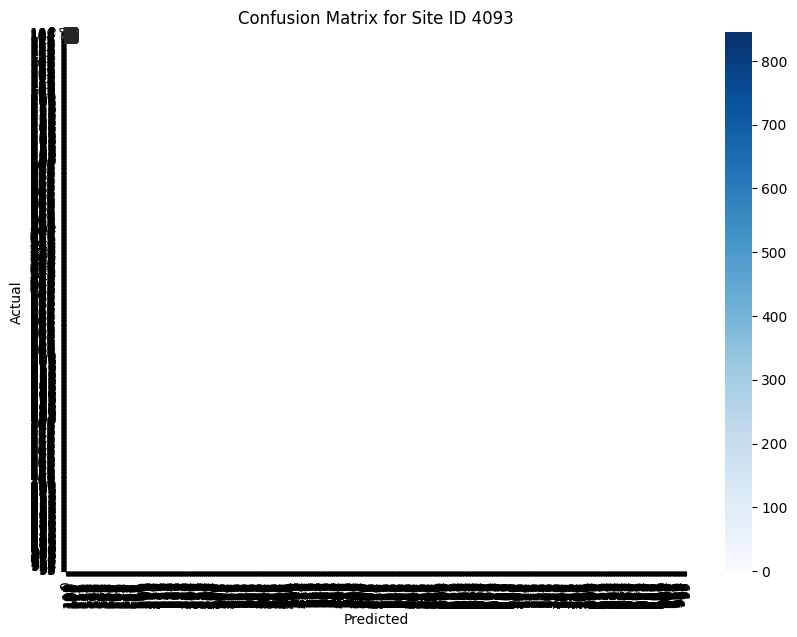

First 10 Predictions for Site ID 4093:
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 254585.4844 - val_loss: 309040.8750
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 243362.8125 - val_loss: 296787.7500
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 227878.2500 - val_loss: 285093.8125
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 217431.5781 - val_loss: 273972.5312
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 202760.2812 - val_loss: 263378.5938
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 205789.0781 - val_loss: 253245.7344
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 188058.8125 - val_loss: 243554.5156
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 181625.0938 - val_loss: 234430.7500
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 180788.8125 - val_loss: 225440.8281
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 163809.4219 - val_loss: 216999.2188
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 168643.3594
Test

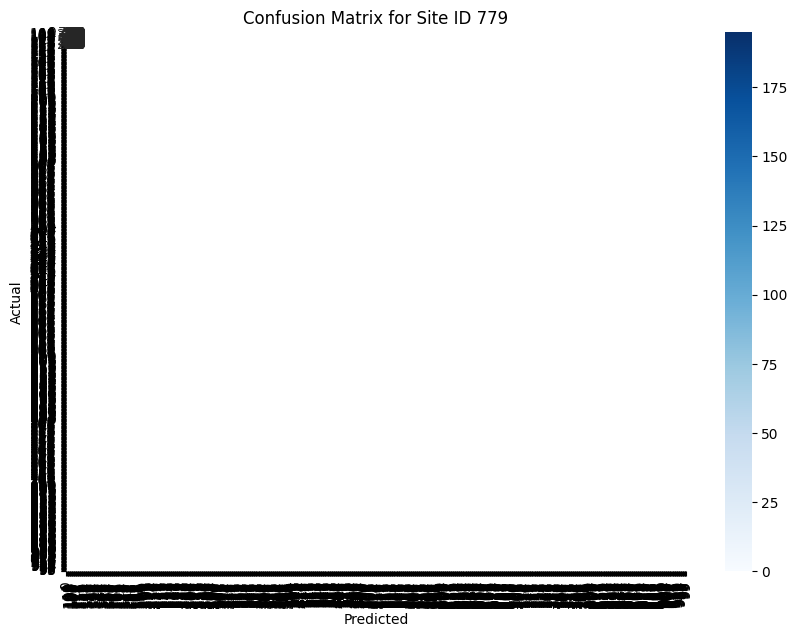

First 10 Predictions for Site ID 779:
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 735217.2500 - val_loss: 715956.4375
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 712006.0625 - val_loss: 700068.5625
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 696198.3125 - val_loss: 684607.4375
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 680870.7500 - val_loss: 669666.0000
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 666041.7500 - val_loss: 655154.0625
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 651622.1875 - val_loss: 640999.1875
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 637546.8750 - val_loss: 627155.7500
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 623775.0625 - val_loss: 613594.8125
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 610280.5000 - val_loss: 600297.0625
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 597045.2500 - val_loss: 587248.6250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 587248.6250
T

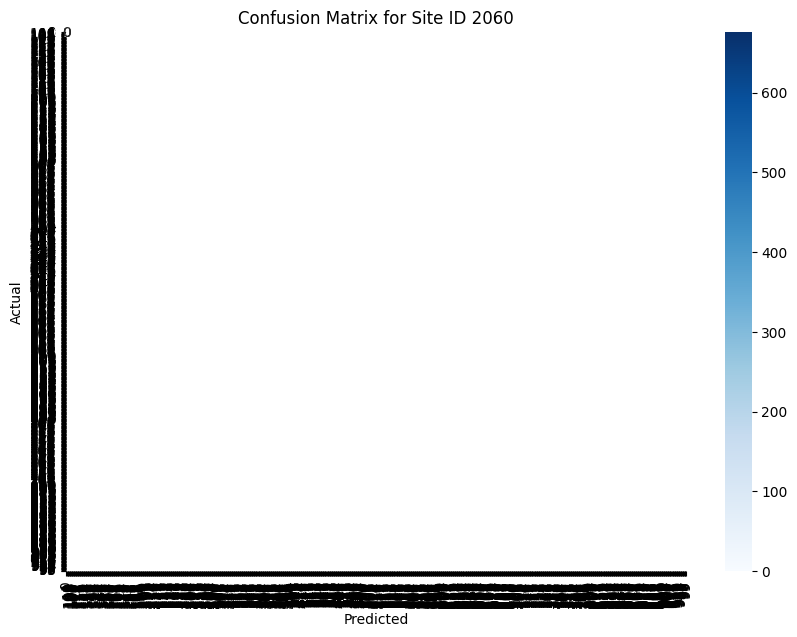

First 10 Predictions for Site ID 2060:
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']


In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical columns
categorical_columns = ['Site ID', 'Domain','Vendor', 'Device Type', 'Alarm Name']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
    label_encoders[column] = le

# Normalize the 'Relative Day Index'
scaler = MinMaxScaler()
df_filtered['Relative Day Index'] = scaler.fit_transform(df_filtered[['Relative Day Index']])

# Prepare the data for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length].to_numpy()
        label = data['Alarm Name'].iloc[i + sequence_length]
        sequences.append((sequence, label))
    return sequences

sequence_length = 5

# Function to build and train the model for each site
def train_and_evaluate_site(site_data):
    # Split the data into training and testing sets (you can modify the split ratio as needed)
    train_data = site_data.copy()
    test_data = site_data.copy()

    # Create sequences for LSTM
    train_sequences = create_sequences(train_data, sequence_length)
    test_sequences = create_sequences(test_data, sequence_length)

    X_train = np.array([seq[0] for seq in train_sequences]).astype('float32')
    y_train = np.array([seq[1] for seq in train_sequences]).astype('float32')
    X_test = np.array([seq[0] for seq in test_sequences]).astype('float32')
    y_test = np.array([seq[1] for seq in test_sequences]).astype('float32')

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(sequence_length, len(columns_to_keep)), return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print(f'Test Loss for Site ID {site_id}: {loss}')

    # Make predictions
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)  # Get the class with the highest probability

    # Calculate accuracy
    accuracy = np.mean(predictions == y_test)
    print(f'Test Accuracy for Site ID {site_id}: {accuracy}')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, predictions)

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoders['Alarm Name'].classes_,
                yticklabels=label_encoders['Alarm Name'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Site ID {site_id}')
    plt.show()

    # Rescale predictions back to original scale
    predictions_rescaled = label_encoders['Alarm Name'].inverse_transform(predictions)

    # Print the first 10 predictions
    print(f"First 10 Predictions for Site ID {site_id}:")
    print(predictions_rescaled[:10])

# Loop through each unique Site ID
for site_id in df_filtered['Site ID'].unique():
    site_data = df_filtered[df_filtered['Site ID'] == site_id]
    train_and_evaluate_site(site_data)